In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sber_data = pd.read_csv('data/sber_data.csv', sep=',')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


# Работа с пропусками
В Pandas пропуски обозначаются специальным символом NaN (Not-a-Number - "не число"). 

## isnull

In [3]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 1.Список столбцов с пропусками
Первый способ - это вывести на экран названия столбцов, где число пропусков больше 0. Для этого вычислим среднее по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце (True - 1, False - 0, при расчете среднего получим долю 1 от общего числа строк). Умножаем на 100%, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:


In [4]:
cols_null_persent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
display(cols_with_null)


hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

## 2. Столбчатая диаграмма пропусков

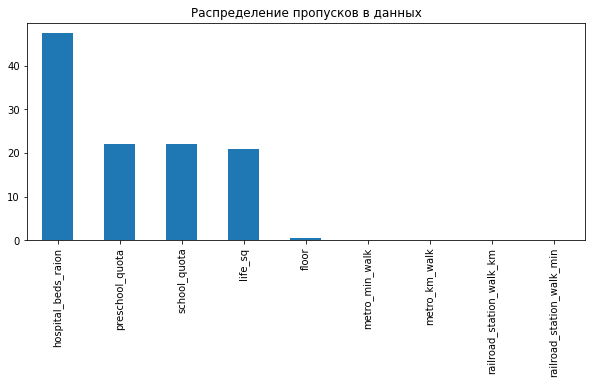

In [5]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

## 3.Тепловая карта пропусков 
позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 
Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых есть пропуск будем отмечать желтым цветом, а остальные - синим, для этого создадим собственную палитру цветов тепловой карты с помощью метода color_pallete() из библиотеки seaborn.

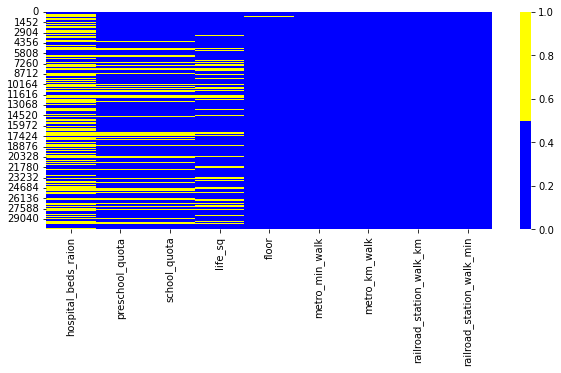

In [6]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

# Методы обработки пропущенных значений
## 1. Отбрасывание записей и признаков dropna()

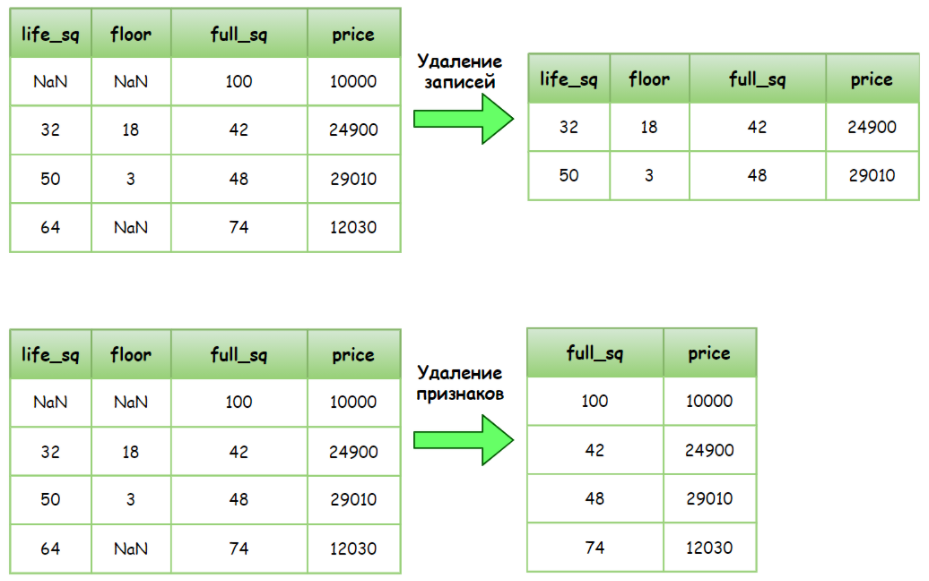

Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. Основные параметры метода:

axis - ось, по которой производится удаление (по умолчанию 0 - строки)

how - как производится удаление строк (any - если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all - если во всех столбцах есть пропуски). 

thresh - порог удаления, определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим thresh в значение 2, то мы отбросим записи, где более 2 пропусков в строке.

Предварительно создадим копию исходной таблицы, чтобы не повредить ее. Зададимся порогом в 70%: будем отбрасывать те столбцы, в которых более 30% пропусков. После чего удаляем записи, в которых содержится хотя бы 1 пропуск. Наконец, выводим информацию о числе пропусков и наслаждаемся нулями. 



In [7]:
drop_data = sber_data.copy()
n = drop_data.shape[0]
thresh = n*0.7
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
drop_data = drop_data.dropna(how='any', axis=0)
display(drop_data.isnull().mean())


id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [8]:
print(drop_data.shape)
##(20886, 55)

(20888, 60)


## 2.Заполнение недостающих значений константами fillna()
Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков.  Важным фактором при выборе метода является распределение признаков с пропусками. В Pandas можно вывести их на экран с помощью метода hist():

array([[<AxesSubplot:title={'center':'hospital_beds_raion'}>,
        <AxesSubplot:title={'center':'preschool_quota'}>,
        <AxesSubplot:title={'center':'school_quota'}>],
       [<AxesSubplot:title={'center':'life_sq'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'metro_min_walk'}>],
       [<AxesSubplot:title={'center':'metro_km_walk'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_km'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_min'}>]],
      dtype=object)

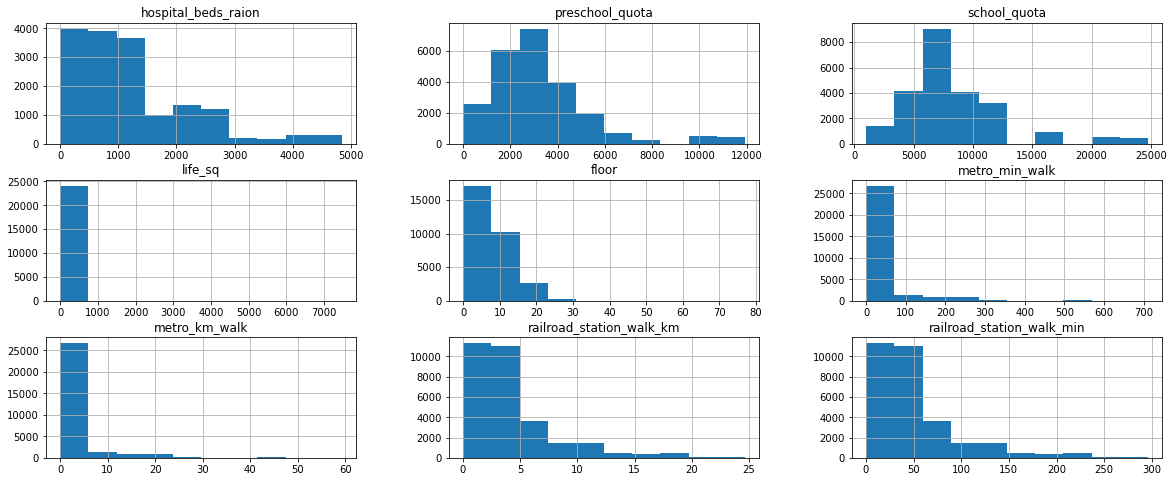

In [9]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8))

Итак, рассмотрим несколько рекомендаций: 

Для распределений похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты (у нас это признаки life_sq, floor, railroad_station_walk_rm, metro_min_walk, metro_km_walk, railroad_station_walk_km, railroad_station_walk_min) высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана - нет. Поэтому предпочтительнее использовать медианное значение для таких признаков.

Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как в результате может получиться нецелое число (например, 2.871 этажа). Поэтому такой признак заполняют либо модой, либо округляют до целого числа среднее/медиану.

Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.


Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода - value - значение, на которое происходит заполнение данных в столбце. Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи - названия столбцов таблицы, а значения словаря - заполняющие константы. 
Создадим такой словарь, соблюдая рекомендации, приведенные выше, а также копию исходной таблицы. Произведем операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:


In [10]:
fill_data = sber_data.copy()
values = {
    'life_sq': fill_data['life_sq'].median(),
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
fill_data = fill_data.fillna(values)
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

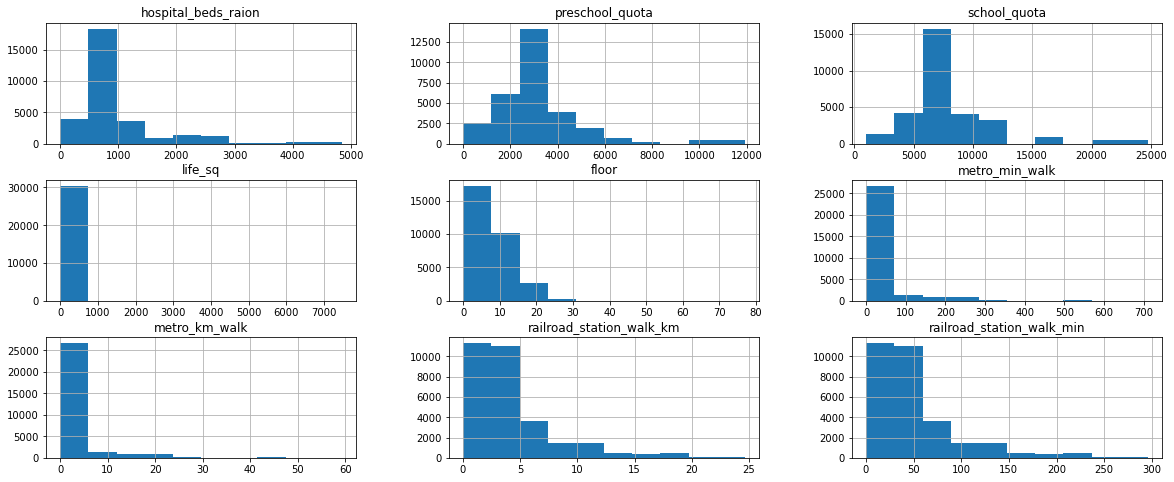

In [11]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

## 3. Заполнение недостающих значений константами с добавлением индикатора

Если мы используем заполнение пропусков константами, то может имеет смысл сказать модели о том, что на этом месте был пропуск? Давайте добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определенном месте в таблице был пропуск, это место в столбце- индикаторе будем помечать как True. Эта эвристика пытается снизить влияние искажения признака, указав модели на места, где мы "нафантазировали" данные.
Схематично метод можно представить следующим образом:
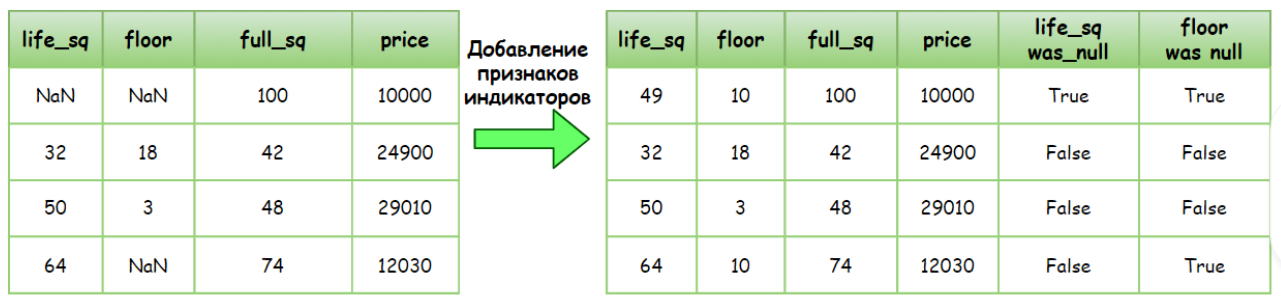

Посмотрим на реализацию. Как обычно, создадим копию исходной таблицы. В цикле пройдемся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "was_null"), который получается из исходного с помощью применения метода isnull(). После чего производим обычное заполнение пропусков, которое мы совершали ранее и выводим на экран число отсутствующих значений в столбце, чтобы убедиться в результате:


In [12]:
indicator_data = sber_data.copy()
for col in cols_with_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
values = {
    'life_sq': indicator_data['life_sq'].median(),
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
indicator_data = indicator_data.fillna(values)
indicator_data.isnull().mean()


id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [13]:
values

{'life_sq': 30.0,
 'metro_min_walk': 20.44720905,
 'metro_km_walk': 1.703934087,
 'railroad_station_walk_km': 3.235539505,
 'railroad_station_walk_min': 38.82647406,
 'hospital_beds_raion': 540.0,
 'preschool_quota': 2395.0,
 'school_quota': 7377.0,
 'floor': 3.0}

In [14]:
indicator_data['hospital_beds_raion'].mode()[0]

540.0

In [15]:
indicator_data.head(5)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_null,preschool_quota_was_null,school_quota_was_null,life_sq_was_null,floor_was_null,metro_min_walk_was_null,metro_km_walk_was_null,railroad_station_walk_km_was_null,railroad_station_walk_min_was_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


Почитать про проклятие размерности http://www.machinelearning.ru/wiki/index.php?title=Проклятие_размерности

## 4. Комбинирование методов
Не обязательно использовать один метод. Вы можете их комбинировать. 
Например, мы можем:

удалить столбцы, в которых более 30% пропусков

удалить записи, в которых более 2 пропусков одновременно в строке

заполнить оставшиеся ячейки константами

Посмотрим на реализацию такого подхода в коде:

In [16]:
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30%
n = combine_data.shape[0] #число признаков
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

#оставшиеся записи заполняем константами в соответствии со словарем values
values = {
    'life_sq': indicator_data['life_sq'].median(),
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
combine_data = combine_data.fillna(values)
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [17]:
print(combine_data.shape)

(26800, 60)


# Работа с выбросами
## Методы выявления выбросов
### 1.Метод ручного поиска и здравого смысла
Рассчитаем статистические показатели для признака жилой площади (life_sq)

In [18]:
	sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [19]:
# Найдем число квартир с нулевой жилой площадью:
print(sber_data[sber_data['life_sq']==0].shape[0])

45


In [20]:
#А теперь выведем здания с жилой площадью более 7000 квадратных метров:
display(sber_data[sber_data['life_sq'] > 7000])


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [21]:
# а много у нас таких квартир, у которых жилая площадь больше, чем суммарная?
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


In [22]:
#От этих ошибочных наблюдений стоит избавиться,воспользовшись методом drop() и удалить записи по их индексам:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


### 2. Метод межквартильного размаха (метод Тьюки)
Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.
На гистограмме мы можем увидеть потенциальные выбросы как низкие далеко отстоящие от основной группы столбцов "пеньки", а на коробчатой диаграмме - точки за пределами усов.


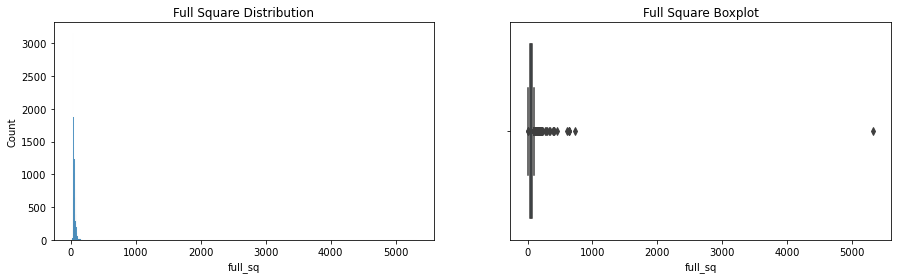

In [23]:
#Построим гистограмму и boxplot для признака полной площади (full_sq):
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');


Визуализация помогает определить наличие выбросов. Для того, чтобы их найти можно воспользоваться статистическими подходами. 
Одним из таких подходов является метод межквартильного размаха(его еще называют методом Тьюки), который используется для построения коробчатой диаграммы.
Алгоритм метода:

вычислить 25-ую и 75-ую квантили (1 и 3 квартили) - Q25и Q75 для признака, который мы исследуем

вычислить межквартильное расстояние:  IOR=Q75-Q25

вычислить верхнюю и нижнюю границы Тьюки: 

bound_lower=Q25 -1.5*IOR

bound_upper=Q75 +1.5*IOR

найти наблюдения, которые выходят за пределы границ

В соответствии с этим алгоритмом напишем функцию outliers_iqr(), которая вам может еще не раз пригодиться в реальных задачах. Данная функция принимает на вход DataFrame и признак, по которому ищутся выбросы, и возвращает потенциальные выбросы, найденные с помощью метода Тьюки, а также очищенный от них датасет.

Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются с помощью фильтрации данных по условию выхода за пределы верхней или нижней границы.


In [24]:
def outliers_iqr(data, feature):
    quartile_1, quartile_3 = data[feature].quantile(0.25), data[feature].quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(data[feature]<lower_bound) | (data[feature] > upper_bound)]
    cleaned = data[(data[feature]>lower_bound) & (data[feature] < upper_bound)]
    return outliers, cleaned


In [25]:
#Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов:

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


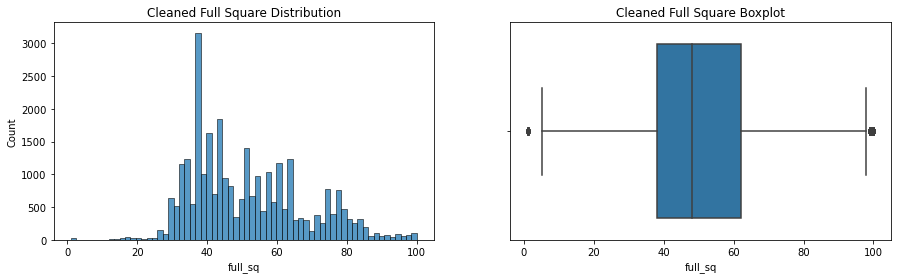

In [26]:
#Согласно классическому методу Тьюки под выбросы у нас попали 963 записи в таблице. 
#Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:
cleaned_sber_data=cleaned
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned_sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned_sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');


In [27]:
cleaned_sber_data.shape

(29508, 61)

In [28]:
# Давайте немного модифицируем нашу функцию outliers_iqr(). Добавьте в нее параметры left и right, которые задают число IQR 
# влево и вправо от границ ящика (пусть по умолчанию они равны 1.5).
# Функция, как и раньше должна возвращать потенциальные выбросы и очищенный DataFrame.
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    quartile_1, quartile_3 = data[feature].quantile(0.25), data[feature].quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(data[feature]<lower_bound) | (data[feature] > upper_bound)]
    cleaned = data[(data[feature]>lower_bound) & (data[feature] < upper_bound)]
    return outliers, cleaned

In [29]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


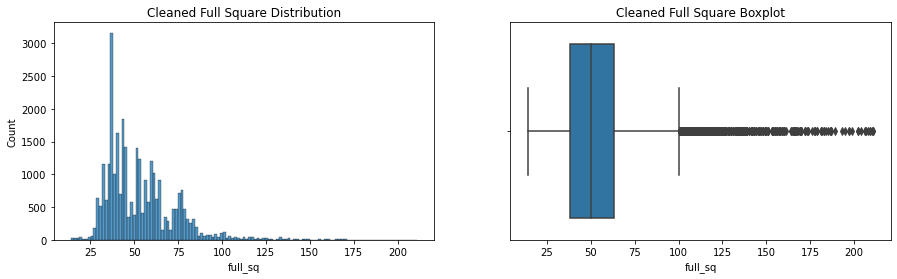

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');


### Метод z-отклонений (метод сигм)
Последний метод, который мы рассмотрим - это метод, основанный на правиле 3ех сигм для нормального распределения. Правило гласит: что, если распределение данных является нормальным, то 99.73% лежат в интервале от (мю-3 сигмы,мю +3 сигмы), где мю - математическое ожидание (для выборки это среднее значение), а  сигма- стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала будут считаться выбросами.
Схематично правило 3ех сигм для нормального распределения представлено на рисунке ниже:


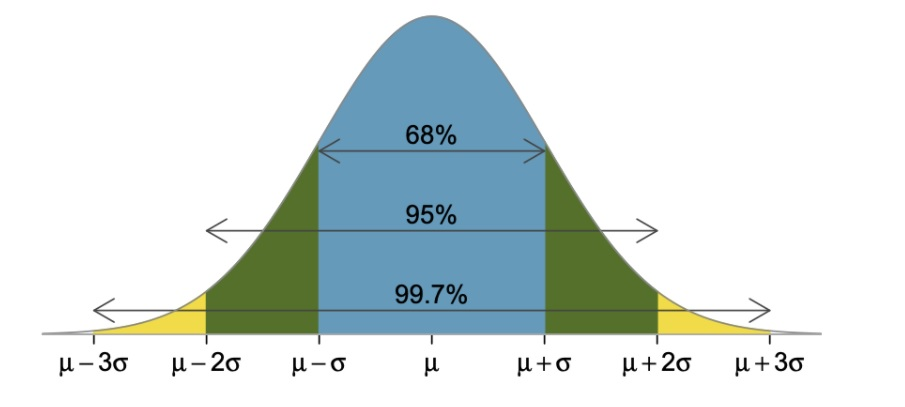

Возникает вопрос, а что делать, если данные не распределены нормально? Иногда для распределений, похожих на логнормальное, может помочь логарифмирование. Оно может привести исходное распределение к подобию нормального. 

Посмотрим на примере. Построим 2 гистограммы признака расстояния до МКАД (mkad_km): первая - в обычном масштабе, а вторая - в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy. Из математики известно, что логарифм от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать warning’и.

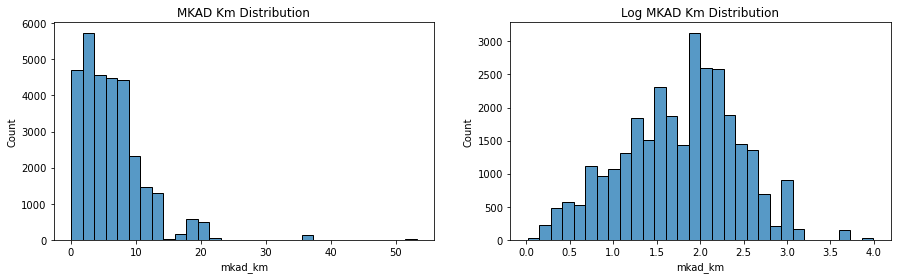

In [31]:
import numpy as np 
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');


Левое распределение сильно напоминает логнормальное распределение с наличием потенциальных выбросов - “пеньков”, далеко отстоящих от основной массы наблюдений.

Взяв натуральный логарифм от левого распределения получаем правое, которое, напоминает слегка перекошенное нормальное. Слева от моды наблюдается чуть больше наблюдений, нежели справа. По научному это будет звучать так: "распределение имеет левостороннюю асимметрию".


Давайте реализуем алгоритм метода z-отклонения. Описание алгоритма метода:
    
вычислить математическое ожидание  (среднее) и стандартное отклонение  признака x

вычислить нижнюю и верхнюю границу интервала как:
    
boundlower=мю - 3 сигма

boundupper=мю + 3 сигма

найти наблюдения, которые выходят за пределы границ

Напишем функцию outliers_z_score(), которая реализует этот алгоритм. На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введем аргумент log, если он равен True, то будем логарифмировать признак, который мы рассматриваем, иначе - оставляем его в исходном виде.
Как и раньше, функция будет возвращать выбросы и очищенные от них данные:


In [32]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [33]:
# Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [34]:
#Интересно узнать, из каких районов (sub_area) представлены эти квартиры:
print(outliers['sub_area'].unique())


['Poselenie Rogovskoe' 'Poselenie Kievskij']


In [35]:
#Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать ассиметричность данных. 
#Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм
#(стандартных отклонений) влево и вправо соответственно, которые определяют границы метода z-отклонения. 
#По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod()
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [36]:
# 6.4.4. Держим в голове, что наше логарифмическое распределение слегка асимметрично влево. 
#Проверим, что будет, если учесть эту асимметрию и дать "послабление" вправо, увеличив число сигм. 
#Мы хотим проверить, начиная с какой границы поселения "Роговское" и "Киевское" перестают считаться выбросами. 
#Примените вашу функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log=True. 
#Чему равно результирующее число выбросов?

outliers_sber, cleaned_sber = outliers_z_score_mod(sber_data, 'mkad_km', right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers_sber.shape[0]}')
print(f'Результирующее число записей: {cleaned_sber.shape[0]}')


Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


## Другие методы поиска выбросов
Конечно же наука о данных не ограничивается только тремя методами. Скажем даже больше: в машинном обучении есть отдельная активно-развивающаяся подобласть, именуемая как Outliers (Anomaly) Detection. Она включает в себя большое количество методов для поиска аномалий в совершенно различных видах данных: от временных рядов до географических данных. Специалисты этой области обучают целые модели, которые помогают отыскать выбросы в данных. 

Мы рассмотрели самые простые, но очень распространенные методы поиска выбросов, главный недостаток которых состоит в том, что они основываются на информации только по одному признаку. Для глубокого поиска аномалий могут использоваться методы, которые используют информацию обо всех признаках.

Например, для поиска аномалий часто используется метод кластеризации DBSCAN, о котором мы еще будем говорить в модуле по кластеризации данных далее в курсе. Метод пытается объединить данные в группы (кластеры), например: квартиры низкого, среднего и премиального класса, опираясь на все признаки. Все, что не попало ни в какой из кластеров помечается как выброс (шумом).

Графическая иллюстрация метода:
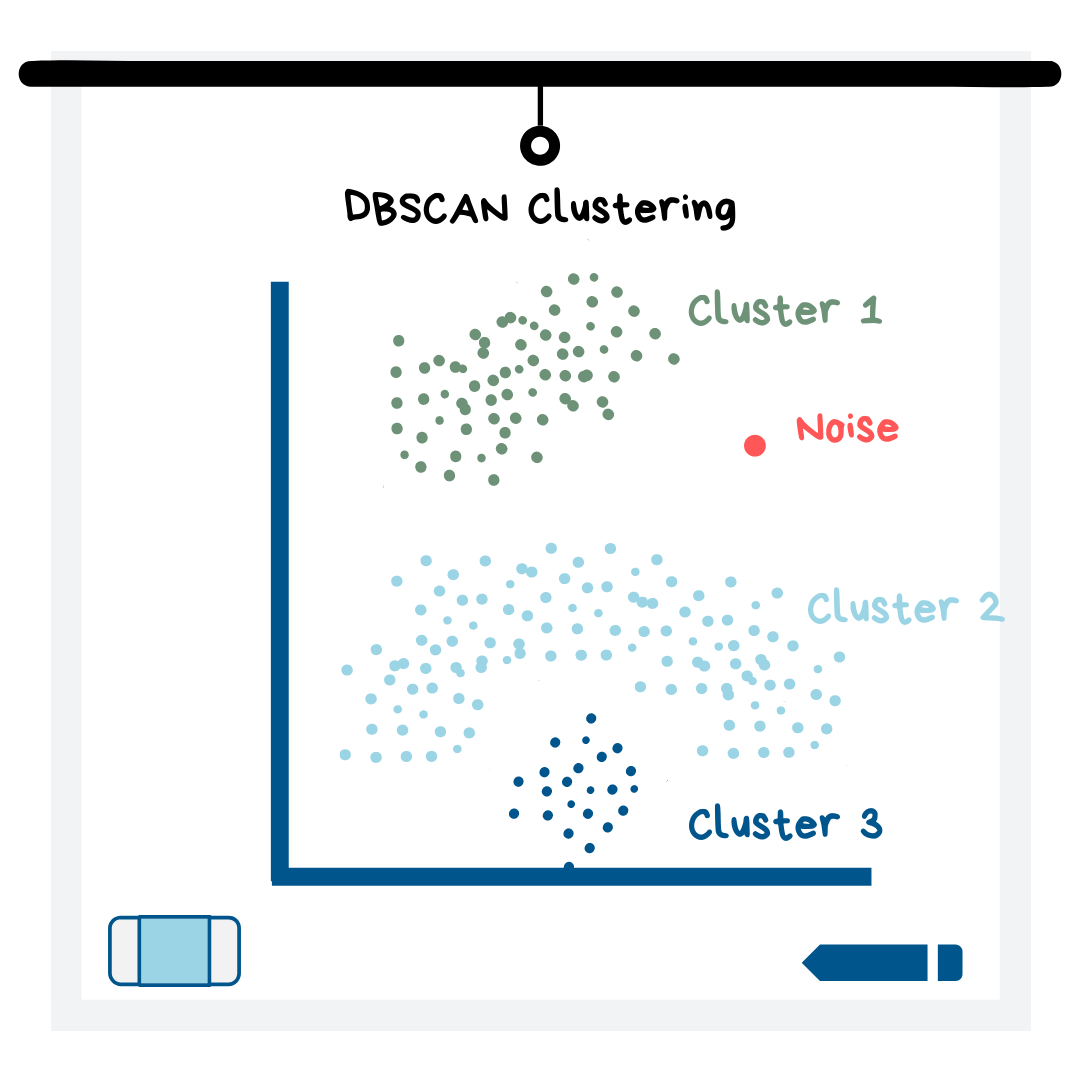

6.4.5. Постройте 2 гистограммы для признака price_doc. Первая - в обычном масштабе, а вторая - в логарифмическом. 
Выберите верные утверждения:

    на первой гистограмме видны потенциальные выбросы +

    вторая гистограмма имеет левостороннюю асимметрию +

    на первой гистограмме отсутствуют потенциальные выбросы

    вторая гистограмма имеет правостороннюю асимметрией

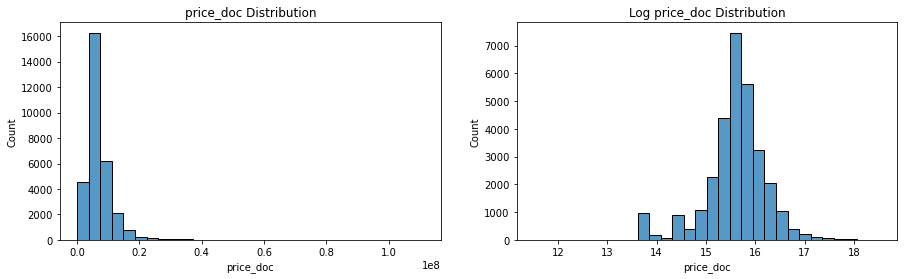

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['price_doc'], bins=30, ax=axes[0])
histplot.set_title('price_doc Distribution');

#гистограмма в логарифмическом масштабе
log_price_doc= np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc , bins=30, ax=axes[1])
histplot.set_title('Log price_doc Distribution');

6.4.6. Найдите потенциальные выбросы помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте "послабление" на 0.7 сигм в сторону, противоположную асимметрии распределения. Сколько выбросов вы получили?
Подсказка: воспользуйтесь функцией outliers_z_score_mod()


In [38]:
outliers_sber, cleaned_sber = outliers_z_score_mod(sber_data, 'price_doc', right=3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers_sber.shape[0]}')
print(f'Результирующее число записей: {cleaned_sber.shape[0]}')

Число выбросов по методу z-отклонения: 68
Результирующее число записей: 30403


Добавьте фишку с логарифмированием в вашу функцию outliers_iqr_mod(). Добавьте в нее параметр log_scale, если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doс. Число межквартильных размахов возьмите как 3 в обе стороны. Чему равно число выбросов, полученных таким методом выбросов?

In [42]:
def outliers_iqr_mod_log(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned


In [43]:
outliers, cleaned = outliers_iqr_mod_log(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


# Работа с дубликатами и неинформативными признаками
## Обнаружение и ликвидация дубликатов
Способ обнаружения дубликатов зависит от того, что именно вы считаете дубликатом. Например, за дубликаты можно посчитать записи, у которых совпадают все признаки или их часть. Если в таблице есть столбец с уникальным идентификатором (id), вы можете попробовать поискать дубликаты по нему: одинаковые записи могут иметь одинаковый id.
Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк. Число уникальных значений вычислим с помощью метода nunique():

In [44]:
sber_data['id'].nunique() == sber_data.shape[0]


True

Для того, чтобы отследить дубликаты можно воспользоваться методом duplicated(), который возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, которые переданы методу, он возвращает True, для остальных - False.
У метода есть параметр subset - список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

Найдем число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 
Создаем маску дубликатов с помощью метода duplicated() и производим с помощью нее фильтрацию, результат заносим в переменную sber_duplicates. Выводим число строк в результирующем DataFrame:


In [45]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


Итого, 562 строки в таблице являются полными копиями других записей. Ручной поиск совпадающих строк по 30 тысячам записей был бы практически невыполним, а с помощью Pandas мы быстро, а главное, легко обнаружили дублирующиеся данные!
Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом drop_duplicates(), который удаляет повторяющиеся записи из таблицы. 
Создадим новую таблицу sber_dedupped, которая будет очищенной от полных дубликатов версией исходной таблицы


In [51]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')


Результирующее число записей: 29909


## Обнаружение и ликвидация неинформативных признаков
В Pandas пока не реализовано магической палочки, которая бы мгновенно выдавала список столбцов, обладающих низкой информативностью, однако процедура их поиска легко реализуется вручную.

Разберем алгоритм:

Создаем пустой список low_information_cols , куда будем добавлять названия признаков, которые мы посчитаем неинформативными

В цикле пройдемся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:
рассчитаем top_freq - наибольшую относительную частоту с помощью метода value_counts() с параметром normalize=True. Метод вернет долю от общих данных, которую занимает каждое уникальное значение в признаке.

Например, для столбца oil_chemistry_raion (нефтехимический район) результат будет следующим:

no - 0.990286
yes - 0.009717

Отсюда нам нужен максимум.

рассчитаем nunique_ratio отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений в столбце получим с помощью метода nunique(), а размер признака с помощью метода count()

Например, для столбца id число уникальных значений - 30471 и оно же равно размеру таблицы. Поэтому результат отношения будет 1.

сравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в наш список неинформативных признаков, если условие истинно.


In [52]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')


id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


Итого, мы нашли 6 неинформативных признаков. Теперь можно удалить их с помощью метода drop(), передав результирующий список в его аргументы.


In [53]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')


Результирующее число признаков: 55


## Закрепление знаний
Настало время потренировать в очистке данных. Поговорим о диабете.

Вам предоставлен набор данных первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Цель набора данных состоит в том, чтобы диагностически предсказать, есть ли у пациента диабет, на основе определенных диагностических измерений. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь - женщины не моложе 21 года индийского происхождения Пима.

Не забудем импортировать библиотеки, которые нам могут понадобится при работею. Прочитаем наши данные и выведем первые 5 строк таблицы:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [2]:
diabetes.shape

(778, 10)

Признаки в данных:

Pregnancies - количество беременностей

Glucose - Концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе

BloodPressure - Диастолическое артериальное давление (мм рт. ст.)

SkinThickness - Толщина кожной складки трицепса (мм)

Insulin - 2-часовой сывороточный инсулин (ме Ед/мл)

BMI - Индекс массы тела (вес в кг/(рост в м)^2)

DiabetesPedigreeFunction - функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости)

Age - возраст

Outcome - наличие диабета (0 - нет, 1 - да)

Gender - пол пациента

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

6.6.1. Начнем с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

Ответ: 10


In [3]:
dupl_columns = list(diabetes.columns)
#dupl_columns.remove('id')

mask = diabetes.duplicated(subset=dupl_columns)
diabet_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabet_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [4]:
dupl_columns = list(diabetes.columns)
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Gender'],
      dtype='object')

In [5]:
duplicates = diabetes[diabetes.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))
diabetes = diabetes.drop_duplicates()
print('Результирующее число записей: {}'.format(diabetes.shape[0]))


Число дубликтов: 10
Результирующее число записей: 768


6.2.2. Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.99: удалите все признаки, для которых 99% значений повторяются или 99% записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек)
Ответ: Gender

In [6]:
def low_informative_feature(data):
    low_information_cols = []
    for col in data.columns:
        top_freq = data[col].value_counts(normalize=True).max()
        nunique_ratio = data[col].nunique() / data[col].count()
        if top_freq > 0.95:
            low_information_cols.append(col)
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
    return low_information_cols
low_information_cols = low_informative_feature(diabetes)
print(low_information_cols)


['Gender']


6.2.3. Попробуйте найти пропуски в данных с помощью метода insull(). Спойлер: ничего не найдете. А они есть! Они скрыты от нас. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулем. Поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим.
Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска, его вы можете взять из библиотеки numpy: np.nan
Сколько процентов пропусков содержится в столбце Insulin?  Ответ округлите до десятых.
Подсказка: создайте функцию, которая возвращает np.nan, если ее аргумент равен 0, в противном случае - возвращает аргумент. Воспользуйтесь методом apply() и примените созданную функцию для каждого перечисленного столбца
Ответ: 0.49

In [7]:
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
Gender                      0.00
dtype: float64

6.2.4. Удалите из данных признаки, где число пропусков более 30%. Сколько признаков осталось в ваших данных?
Ответ: 8

In [8]:
thresh = diabetes.shape[0]*0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
print(diabetes.shape[1])

9


6.2.5. Удалите из данных только те строки, в которых минимум 2 пропуска одновременно. Чему равно результирующее число записей в таблице?
Ответ: 761

In [10]:
#Возможный вариант решения:
m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=m-2, axis=0)
print(diabetes.shape[0])


761


6.2.6. В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness. Ответ округлите до десятых.
Ответ: 29.1

In [13]:
null_data = diabetes.isnull().sum()
cols = null_data[null_data>0].index
for col in cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())
#print(diabetes['SkinThickness'].mean().round(1))
print(diabetes['SkinThickness'].mean())

29.109067017082786


6.2.7. Сколько выбросов найдет классический метод межквартильного размаха в признаке SkinThickness?

Ответ: 87

In [14]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'SkinThickness')
print(outliers.shape[0])

87


6.2.8. Сколько выбросов найдет классический метод z-отклонения в признаке SkinThickness?

Ответ: 4

In [15]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_z_score_mod(diabetes, 'SkinThickness')
print(outliers.shape[0])


4


6.2.9. На приведенной гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный и он заставляет задуматься о логарифмировании признака. 
Найдите сначала число выбросов в признаке DiabetesPedigreeFunctionс помощью классического метода межквартильного размаха. 

А потом найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании 1 прибавлять не нужно!). На сколько отличаются 2 этих числа (вычтите из первого второе)

Ответ: 29

In [16]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

29
